# COVID-Team-1
## Dr. Mohanty
## Katelynn Urgitus
## CSC 405-01
## Last Updated: 10/24/2020
## I, Katelynn Urgitus, have abided by the UNCG Academic Integrity Policy.

### ---------------------------------------------------------------------------------------------------------------------------------

In this notebook I will be:


fitting a distribution to the number of COVID-19 cases of Pennsylvania,
        
modelling a poission distribution of COVID-19 cases and deaths of Pennsylvania and compare to other 5 states,

modelling poission distributions for North Carolina counties COVID-19 in cases and deaths, and
    
performing corelation between Enrichment data valiables and COVID-19 cases to observe any patterns

### ---------------------------------------------------------------------------------------------------------------------------------

In [1]:
import os 
os.chdir("../")

In [2]:
import ipynb
from ipynb.fs.full import covid_data as cd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
# Telling pandas not convert to html tags.
pd.set_option('display.html.table_schema', True)
# Max columns and rows to display.
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 7)

## Data Paths

In [4]:
penn_daily_cases = "../data/Covid/Kat/Pennsylvania/Penn_Cases.csv"
all_daily_cases = "../data/Covid/Kat/6_cases_normalized.csv"
all_daily_deaths = "../data/Covid/Kat/6_deaths_normalized.csv"
_cases = "../data/Covid/Daily/daily_new_cases_normalized.csv"
_deaths = "../data/Covid/Daily/daily_new_deaths_normalized.csv"
penn_hosp  = "../data/Hospitals/hospital_merged_covid_penn.csv"

In [5]:
df_daily_penn =  pd.read_csv(penn_daily_cases, index_col = 0)
df_daily_penn_summed = df_daily_penn.sum()

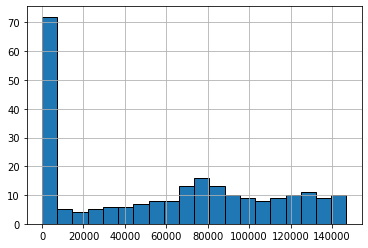

In [6]:
graph = df_daily_penn_summed.hist(bins = 20, ec = "black")

In [7]:
df_daily_penn_summed.kurtosis()

-1.3828562439551506

The negative kurtosis indicates a Platykuric distribution. This means that the data has smaller outliers, but as we can see from the graph, the data has a big left outlier. This is a result of lower numbers occuring more often.

In [8]:
df_daily_penn_summed.mean()

59612.799163179916

In [9]:
df_daily_penn_summed.skew()

0.11774378232174565

The Skew is positive, meaning it has a longer right tail.

I chose this distribution because we are using discrete data and not continuous data. 

### Model a poission distribution of COVID-19 cases and deaths

In [10]:
all_daily_cases_states = pd.read_csv(all_daily_cases, index_col = 0)
all_daily_deaths_states = pd.read_csv(all_daily_deaths, index_col = 0)

#### Cases

In [11]:
all_daily_cases_states

,cases - 1/22/20,cases - 1/23/20,cases - 1/24/20,cases - 1/25/20,cases - 1/26/20,...,cases - 9/12/20,cases - 9/13/20,cases - 9/14/20,cases - 9/15/20,cases - 9/16/20
State,,,,,,,,,,,
CA,0,0,0,0,1,...,762,503,1262,735,743
CO,0,0,0,0,0,...,717,719,662,693,1021
PA,0,0,0,0,0,...,718,59,925,898,608
TN,0,0,0,0,0,...,1545,1214,3327,1372,2779
TX,0,0,0,0,0,...,1528,1208,886,1846,2115
WA,1,0,0,0,0,...,608,461,410,435,443


In [12]:
ca_mu = all_daily_cases_states.loc['CA'].mean() / 100
co_mu = all_daily_cases_states.loc['CO'].mean() / 100
pa_mu = all_daily_cases_states.loc['PA'].mean() / 100
tn_mu = all_daily_cases_states.loc['TN'].mean() / 100
tx_mu = all_daily_cases_states.loc['TX'].mean() / 100
wa_mu = all_daily_cases_states.loc['WA'].mean() / 100

In [13]:
ca_poisson = stats.poisson.rvs(mu = ca_mu, size = 800)
co_poisson = stats.poisson.rvs(mu = co_mu, size = 800)
pa_poisson = stats.poisson.rvs(mu = pa_mu, size = 800)
tn_poisson = stats.poisson.rvs(mu = tn_mu, size = 800)
tx_poisson = stats.poisson.rvs(mu = tx_mu, size = 800)
wa_poisson = stats.poisson.rvs(mu = wa_mu, size = 800)

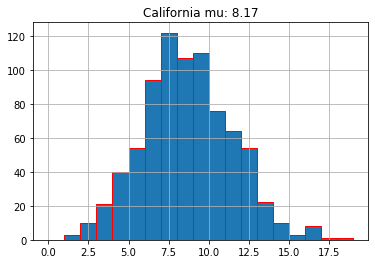

In [14]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(ca_poisson).hist(range=(0,max(ca_poisson) + 1)
                                    , bins=max(ca_poisson)+1,ax = axis, ec='red')
axis.title.set_text("California mu: {:.2f}".format(ca_mu))
plt.show()

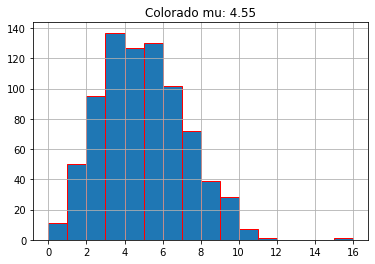

In [15]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(co_poisson).hist(range=(0,max(co_poisson) + 1)
                                    , bins=max(co_poisson)+1,ax = axis, ec='red')
axis.title.set_text("Colorado mu: {:.2f}".format(co_mu))
plt.show()

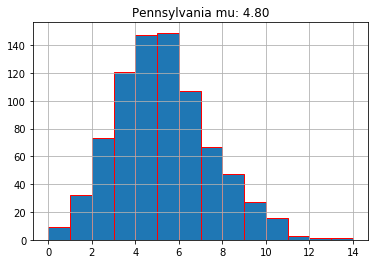

In [16]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(pa_poisson).hist(range=(0,max(pa_poisson) + 1)
                                    , bins=max(pa_poisson)+1,ax = axis, ec='red')
axis.title.set_text("Pennsylvania mu: {:.2f}".format(pa_mu))
plt.show()

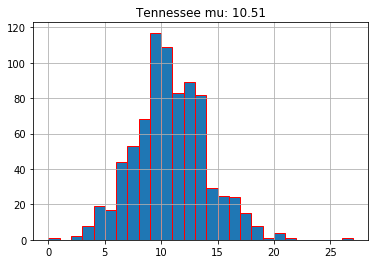

In [17]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(tn_poisson).hist(range=(0,max(tn_poisson) + 1)
                                    , bins=max(tn_poisson)+1,ax = axis, ec='red')
axis.title.set_text("Tennessee mu: {:.2f}".format(tn_mu))
plt.show()

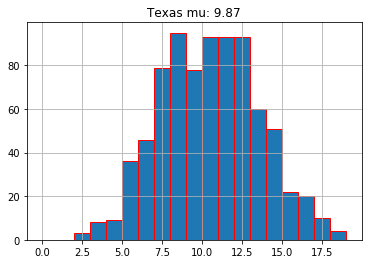

In [18]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(tx_poisson).hist(range=(0,max(tx_poisson) + 1)
                                    , bins=max(tx_poisson)+1,ax = axis, ec='red')
axis.title.set_text("Texas mu: {:.2f}".format(tx_mu))
plt.show()

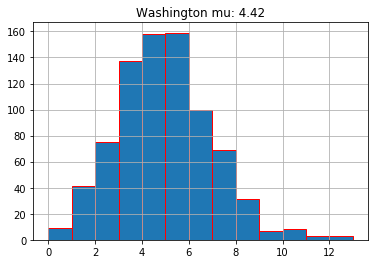

In [19]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(wa_poisson).hist(range=(0,max(wa_poisson) + 1)
                                    , bins=max(wa_poisson)+1,ax = axis, ec='red')
axis.title.set_text("Washington mu: {:.2f}".format(wa_mu))
plt.show()

#### Deaths

In [20]:
all_daily_deaths_states

,deaths - 1/22/20,deaths - 1/23/20,deaths - 1/24/20,deaths - 1/25/20,deaths - 1/26/20,...,deaths - 9/12/20,deaths - 9/13/20,deaths - 9/14/20,deaths - 9/15/20,deaths - 9/16/20
State,,,,,,,,,,,
CA,0,0,0,0,0,...,18,13,21,37,24
CO,0,0,0,0,0,...,5,0,3,10,10
PA,0,0,0,0,0,...,0,0,25,5,22
TN,0,0,0,0,0,...,63,22,25,44,38
TX,0,0,0,0,0,...,51,16,7,46,47
WA,0,0,0,0,0,...,0,0,20,12,7


In [21]:
d_ca_mu = all_daily_deaths_states.loc['CA'].mean() / 100
d_co_mu = all_daily_deaths_states.loc['CO'].mean() / 100
d_pa_mu = all_daily_deaths_states.loc['PA'].mean() / 100
d_tn_mu = all_daily_deaths_states.loc['TN'].mean() / 100
d_tx_mu = all_daily_deaths_states.loc['TX'].mean() / 100
d_wa_mu = all_daily_deaths_states.loc['WA'].mean() / 100

In [22]:
d_ca_poisson = stats.poisson.rvs(mu = d_ca_mu, size = 800)
d_co_poisson = stats.poisson.rvs(mu = d_co_mu, size = 800)
d_pa_poisson = stats.poisson.rvs(mu = d_pa_mu, size = 800)
d_tn_poisson = stats.poisson.rvs(mu = d_tn_mu, size = 800)
d_tx_poisson = stats.poisson.rvs(mu = d_tx_mu, size = 800)
d_wa_poisson = stats.poisson.rvs(mu = d_wa_mu, size = 800)

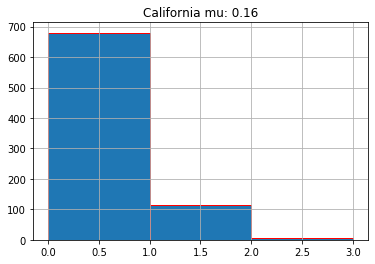

In [23]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(d_ca_poisson).hist(range=(0,max(d_ca_poisson) + 1)
                                    , bins=max(d_ca_poisson)+1,ax = axis, ec='red')
axis.title.set_text("California mu: {:.2f}".format(d_ca_mu))
plt.show()

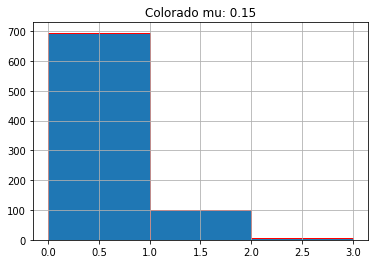

In [24]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(d_co_poisson).hist(range=(0,max(d_co_poisson) + 1)
                                    , bins=max(d_co_poisson)+1,ax = axis, ec='red')
axis.title.set_text("Colorado mu: {:.2f}".format(d_co_mu))
plt.show()

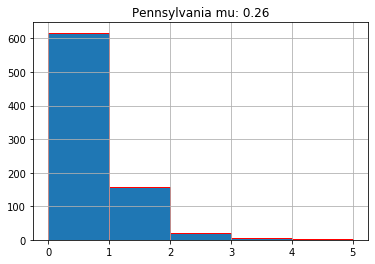

In [25]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(d_pa_poisson).hist(range=(0,max(d_pa_poisson) + 1)
                                    , bins=max(d_pa_poisson)+1,ax = axis, ec='red')
axis.title.set_text("Pennsylvania mu: {:.2f}".format(d_pa_mu))
plt.show()

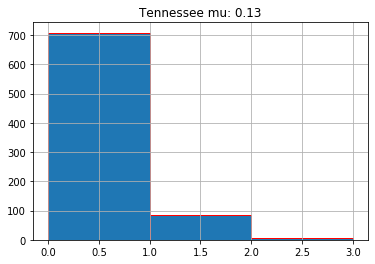

In [26]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(d_tn_poisson).hist(range=(0,max(d_tn_poisson) + 1)
                                    , bins=max(d_tn_poisson)+1,ax = axis, ec='red')
axis.title.set_text("Tennessee mu: {:.2f}".format(d_tn_mu))
plt.show()

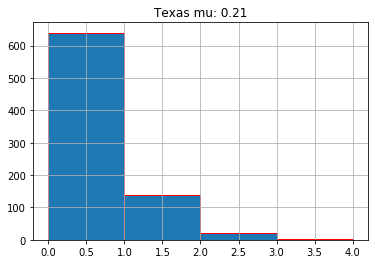

In [27]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(d_tx_poisson).hist(range=(0,max(d_tx_poisson) + 1)
                                    , bins=max(d_tx_poisson)+1,ax = axis, ec='red')
axis.title.set_text("Texas mu: {:.2f}".format(d_tx_mu))
plt.show()

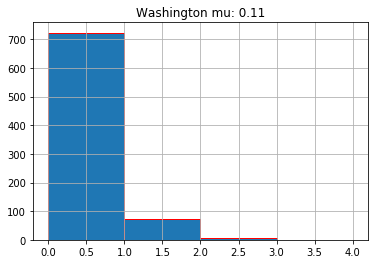

In [28]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(d_wa_poisson).hist(range=(0,max(d_wa_poisson) + 1)
                                    , bins=max(d_wa_poisson)+1,ax = axis, ec='red')
axis.title.set_text("Washington mu: {:.2f}".format(d_wa_mu))
plt.show()

### Poisson For NC

In [29]:
cases = pd.read_csv(_cases, index_col = 0)
deaths = pd.read_csv(_deaths, index_col = 0)

In [30]:
nc_cases = cases.loc['NC']
nc_deaths = deaths.loc['NC']

In [31]:
nc_mu = nc_cases.mean() / 100
d_nc_mu = nc_deaths.mean() / 100

In [32]:
nc_poisson = stats.poisson.rvs(mu = nc_mu, size = 800)
d_nc_poisson = stats.poisson.rvs(mu = d_nc_mu, size = 800)

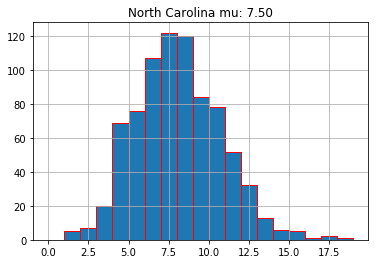

In [33]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(nc_poisson).hist(range=(0,max(nc_poisson) + 1)
                                    , bins=max(nc_poisson)+1,ax = axis, ec='red')
axis.title.set_text("North Carolina mu: {:.2f}".format(nc_mu))
plt.show()

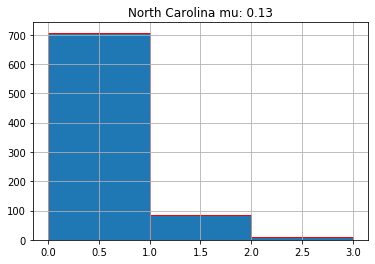

In [34]:
fig,axis = plt.subplots(gridspec_kw={'hspace': .5, 'wspace': .5})
figure = pd.DataFrame(d_nc_poisson).hist(range=(0,max(d_nc_poisson) + 1)
                                    , bins=max(d_nc_poisson)+1,ax = axis, ec='red')
axis.title.set_text("North Carolina mu: {:.2f}".format(d_nc_mu))
plt.show()

### Enrichment Correlation

In [35]:
hosp_data = pd.read_csv(penn_hosp, index_col = 0)

In [36]:
hosp_data.sort_values(by = ['cases'])

,cases,deaths,population,HOSPITAL_NAME,HOSPITAL_TYPE,...,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
County Name,,,,,,,,,,,
Cameron County,8,0,4447,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Sullivan County,10,0,6066,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Forest County,14,0,7247,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Philadelphia County,30620,1797,1584064,Shriners Hospitals for Children - Philadelphia,Childrens Hospital,...,19.0,NaN,NaN,0.0,1.0
Philadelphia County,30620,1797,1584064,Chestnut Hill Hospital (AKA Chestnut Hill Heal...,Short Term Acute Care Hospital,...,14.0,0.0,0.637735,20.0,8.0
Philadelphia County,30620,1797,1584064,Friends Hospital,Psychiatric Hospital,...,1.0,0.0,0.941881,0.0,1.0


From this datatable, we can see that the counties that have the least total number of cases are also the counties that don't contain any hospitals at all. This would lead me to believe that these counties are getting their numbers from small doctors offices for the people that stay in the county to be treated. This would also mean that the people that are being tested outside f their county are being included in surrounding counties case and death numbers.

In [37]:
hosp_data.sort_values(by = ['cases'], ascending = False)

,cases,deaths,population,HOSPITAL_NAME,HOSPITAL_TYPE,...,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
County Name,,,,,,,,,,,
Philadelphia County,30620,1797,1584064,Thomas Jefferson University Hospital,Short Term Acute Care Hospital,...,29.0,80.0,0.697514,76.0,29.0
Philadelphia County,30620,1797,1584064,Friends Hospital,Psychiatric Hospital,...,1.0,0.0,0.941881,0.0,1.0
Philadelphia County,30620,1797,1584064,Einstein Medical Center Philadelphia,Short Term Acute Care Hospital,...,32.0,23.0,0.695143,241.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
Forest County,14,0,7247,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Sullivan County,10,0,6066,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Cameron County,8,0,4447,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


We can see that the highest population county. Philadelphia County, has the most cases, with Allegheny close behind.

In [38]:
hosp_data.sort_values(by = ['Potential_Increase_In_Bed_Capac'], ascending = False)

,cases,deaths,population,HOSPITAL_NAME,HOSPITAL_TYPE,...,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
County Name,,,,,,,,,,,
Allegheny County,11431,341,1216045,UPMC Presbyterian,Short Term Acute Care Hospital,...,160.0,0.0,0.770069,367.0,20.0
Philadelphia County,30620,1797,1584064,Temple University Hospital,Short Term Acute Care Hospital,...,53.0,26.0,0.683059,281.0,40.0
Philadelphia County,30620,1797,1584064,Einstein Medical Center Philadelphia,Short Term Acute Care Hospital,...,32.0,23.0,0.695143,241.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
Pike County,559,21,55809,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Snyder County,236,3,40372,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Sullivan County,10,0,6066,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


Our top two counties also have the highest potential for an increase bed capacity at their hospitals. This means people are more likely to be allowed into these hospitals if there is an overfill in another county nearby.

In [39]:
hosp_data.sort_values(by = ['BED_UTILIZATION'])

,cases,deaths,population,HOSPITAL_NAME,HOSPITAL_TYPE,...,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
County Name,,,,,,,,,,,
Mercer County,662,13,109424,Edgewood Surgical Hospital,Short Term Acute Care Hospital,...,2.0,0.0,0.029589,0.0,0.0
Wyoming County,72,8,26794,Tyler Memorial Hospital,Short Term Acute Care Hospital,...,6.0,0.0,0.060959,0.0,2.0
Columbia County,847,35,64964,Berwick Hospital Center,Short Term Acute Care Hospital,...,10.0,0.0,0.085498,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
Snyder County,236,3,40372,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Sullivan County,10,0,6066,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Westmoreland County,2003,49,348899,AHN Hempfield Neighborhood Hospital,Short Term Acute Care Hospital,...,32.0,NaN,NaN,0.0,0.0


These counties have the smallest bed utilization. A potential influx of covid patients could be handled theoretically, but this could also mean that the staff are used to a small number of patients and will have to quickly adapt or even hire more employees.

In [40]:
hosp_data.sort_values(by = ['NUM_STAFFED_BEDS'])

,cases,deaths,population,HOSPITAL_NAME,HOSPITAL_TYPE,...,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
County Name,,,,,,,,,,,
Philadelphia County,30620,1797,1584064,Wills Eye Hospital,Short Term Acute Care Hospital,...,1.0,0.0,0.524658,0.0,0.0
Mercer County,662,13,109424,Edgewood Surgical Hospital,Short Term Acute Care Hospital,...,2.0,0.0,0.029589,0.0,0.0
Allegheny County,11431,341,1216045,AHN McCandless Neighborhood Hospital,Short Term Acute Care Hospital,...,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Snyder County,236,3,40372,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Sullivan County,10,0,6066,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Westmoreland County,2003,49,348899,AHN Hempfield Neighborhood Hospital,Short Term Acute Care Hospital,...,32.0,NaN,NaN,0.0,0.0


Taking a look at the number of staffed beds helps affirm my earlier belief that they may be understaffed or unprepared for an increase of patients.